## Titanic Survival Prediction with KNN

## Import Library

In [1]:
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Import Dataset and preprocessing

In [3]:
df = pd.read_csv('Titanic-Dataset.csv')
df=pd.DataFrame(df)


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Parch'].nunique()

7

In [6]:
df['Fare'].nunique()

248

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df['Fare']

0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: Fare, Length: 891, dtype: float64

In [10]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,0.271174,1,0,0.014151,S
1,1,1,female,0.472229,1,0,0.139136,C
2,1,3,female,0.321438,0,0,0.015469,S
3,1,1,female,0.434531,1,0,0.103644,S
4,0,3,male,0.434531,0,0,0.015713,S


In [12]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [13]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [14]:
df['Age'].isna().sum()

np.int64(0)

In [15]:
df= pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch'])

In [16]:
df

,Survived,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,0.271174,0.014151,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1,1,0.472229,0.139136,True,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,1,0.321438,0.015469,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,1,0.434531,0.103644,True,False,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,0.434531,0.015713,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.025374,False,True,False,False,True,False,True,...,False,False,False,True,False,False,False,False,False,False
887,1,0.233476,0.058556,True,False,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
888,0,0.367921,0.045771,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
889,1,0.321438,0.058556,False,True,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [17]:
df.nunique()

Survived        2
Age            89
Fare          248
Sex_female      2
Sex_male        2
Embarked_C      2
Embarked_Q      2
Embarked_S      2
Pclass_1        2
Pclass_2        2
Pclass_3        2
SibSp_0         2
SibSp_1         2
SibSp_2         2
SibSp_3         2
SibSp_4         2
SibSp_5         2
SibSp_8         2
Parch_0         2
Parch_1         2
Parch_2         2
Parch_3         2
Parch_4         2
Parch_5         2
Parch_6         2
dtype: int64

In [18]:
df.dtypes

Survived        int64
Age           float64
Fare          float64
Sex_female       bool
Sex_male         bool
Embarked_C       bool
Embarked_Q       bool
Embarked_S       bool
Pclass_1         bool
Pclass_2         bool
Pclass_3         bool
SibSp_0          bool
SibSp_1          bool
SibSp_2          bool
SibSp_3          bool
SibSp_4          bool
SibSp_5          bool
SibSp_8          bool
Parch_0          bool
Parch_1          bool
Parch_2          bool
Parch_3          bool
Parch_4          bool
Parch_5          bool
Parch_6          bool
dtype: object

In [19]:
df.isna().sum()

Survived      0
Age           0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
dtype: int64

In [20]:
df= df.drop(['Embarked_C','Pclass_1' ,'SibSp_0' , 'Parch_0'] , axis =1)

In [21]:
df.head()

,Survived,Age,Fare,Sex_female,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,SibSp_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,0.271174,0.014151,False,True,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,1,0.472229,0.139136,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1,0.321438,0.015469,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0.434531,0.103644,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,0.434531,0.015713,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df=df.replace(to_replace=True, value=1)

In [23]:
df

,Survived,Age,Fare,Sex_female,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,SibSp_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,0.271174,0.014151,False,1,False,1,False,1,1,...,False,False,False,False,False,False,False,False,False,False
1,1,0.472229,0.139136,1,False,False,False,False,False,1,...,False,False,False,False,False,False,False,False,False,False
2,1,0.321438,0.015469,1,False,False,1,False,1,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0.434531,0.103644,1,False,False,1,False,False,1,...,False,False,False,False,False,False,False,False,False,False
4,0,0.434531,0.015713,False,1,False,1,False,1,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.025374,False,1,False,1,1,False,False,...,False,False,False,False,False,False,False,False,False,False
887,1,0.233476,0.058556,1,False,False,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
888,0,0.367921,0.045771,1,False,False,1,False,1,1,...,False,False,False,False,False,1,False,False,False,False
889,1,0.321438,0.058556,False,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df=df.replace(to_replace=False, value=0)

C:\Users\s4sha\AppData\Local\Temp\ipykernel_22592\1250179702.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(to_replace=False, value=0)


In [25]:
df 

,Survived,Age,Fare,Sex_female,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,SibSp_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,0.271174,0.014151,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0.472229,0.139136,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0.321438,0.015469,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.434531,0.103644,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.434531,0.015713,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.025374,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
887,1,0.233476,0.058556,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0.367921,0.045771,1,0,0,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
889,1,0.321438,0.058556,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train Test Split

In [26]:
y= df['Survived']

In [27]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [28]:
X = df.iloc[:, 1:]

In [29]:
X

,Age,Fare,Sex_female,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0.271174,0.014151,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,0.472229,0.139136,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.321438,0.015469,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0.434531,0.103644,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.434531,0.015713,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
887,0.233476,0.058556,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
888,0.367921,0.045771,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0
889,0.321438,0.058556,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test , y_train, y_test = train_test_split(X , y, test_size = 0.20 , random_state = 42)

In [32]:
X_test.shape

(179, 20)

In [33]:
y_test.shape

(179,)

In [34]:
y_train.shape

(712,)

In [35]:
X_train.shape

(712, 20)

## Model Training 

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)

In [37]:
model_1=model.fit(X_train, y_train)

In [38]:
model_1

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [39]:
y_pred = model_1.predict(X_test)

In [40]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

## Model Evaluation and Accuracy

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
k_range = range(1 ,20)
score = []
for k in k_range:
    model =KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train , y_train)
    accuracy = model.score(X_test , y_test)
    score.append(accuracy)
    print('k = %d Accuracy = %.2f%%' % (k, accuracy*100))

k = 1 Accuracy = 77.65%
k = 2 Accuracy = 78.77%
k = 3 Accuracy = 78.77%
k = 4 Accuracy = 77.65%
k = 5 Accuracy = 79.33%
k = 6 Accuracy = 79.89%
k = 7 Accuracy = 81.01%
k = 8 Accuracy = 78.77%
k = 9 Accuracy = 77.65%
k = 10 Accuracy = 78.77%
k = 11 Accuracy = 78.77%
k = 12 Accuracy = 78.21%
k = 13 Accuracy = 78.21%
k = 14 Accuracy = 78.77%
k = 15 Accuracy = 79.89%
k = 16 Accuracy = 79.89%
k = 17 Accuracy = 81.01%
k = 18 Accuracy = 80.45%
k = 19 Accuracy = 79.89%


Text(0, 0.5, 'value of k')

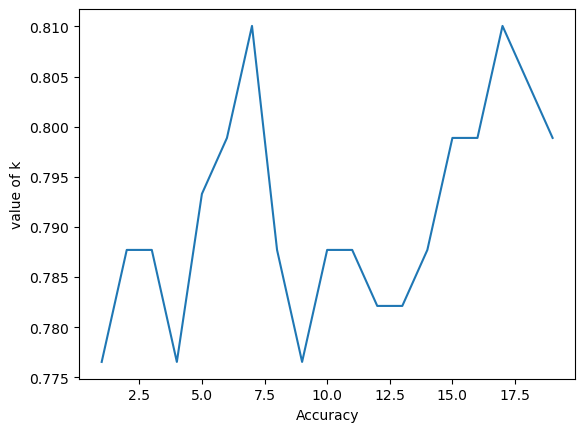

In [43]:
plt.plot(k_range , score)
plt.xlabel('Accuracy')
plt.ylabel('value of k')

In [44]:
model = KNeighborsClassifier(n_neighbors = 7 , metric = 'euclidean')

In [45]:
model.fit(X_train , y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [51]:
y_predict = model.predict(X_test)

In [59]:
y_predict = model.predict([[0.271174, 	0.014151,	0	,1,	0,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0]])

E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [60]:
y_predict

array([0])